## Importing Packages

In [4]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [5]:
year = 2024
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (494.7 MB) C:\Users\odath\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '7

## Loading and Preparing Lap Data

In [6]:
laps = session.laps
laps = laps.sort_values(['Driver', 'LapNumber'])
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
416,0 days 00:59:57.332000,ALB,23,0 days 00:01:41.588000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:39.644000,...,Williams,0 days 00:58:15.512000,2024-07-07 14:03:12.541,1,12.0,False,,False,False,101.588
417,0 days 01:01:30.490000,ALB,23,0 days 00:01:33.158000,2.0,1.0,NaT,NaT,0 days 00:00:29.620000,0 days 00:00:38.091000,...,Williams,0 days 00:59:57.332000,2024-07-07 14:04:54.361,1,12.0,False,,False,True,93.158
418,0 days 01:03:03.863000,ALB,23,0 days 00:01:33.373000,3.0,1.0,NaT,NaT,0 days 00:00:29.733000,0 days 00:00:38.034000,...,Williams,0 days 01:01:30.490000,2024-07-07 14:06:27.519,1,12.0,False,,False,True,93.373
419,0 days 01:04:36.922000,ALB,23,0 days 00:01:33.059000,4.0,1.0,NaT,NaT,0 days 00:00:29.543000,0 days 00:00:38.062000,...,Williams,0 days 01:03:03.863000,2024-07-07 14:08:00.892,1,12.0,False,,False,True,93.059
420,0 days 01:06:09.768000,ALB,23,0 days 00:01:32.846000,5.0,1.0,NaT,NaT,0 days 00:00:29.783000,0 days 00:00:37.726000,...,Williams,0 days 01:04:36.922000,2024-07-07 14:09:33.951,1,12.0,False,,False,True,92.846


## Compound color map

In [7]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': "#C6BFBF",
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

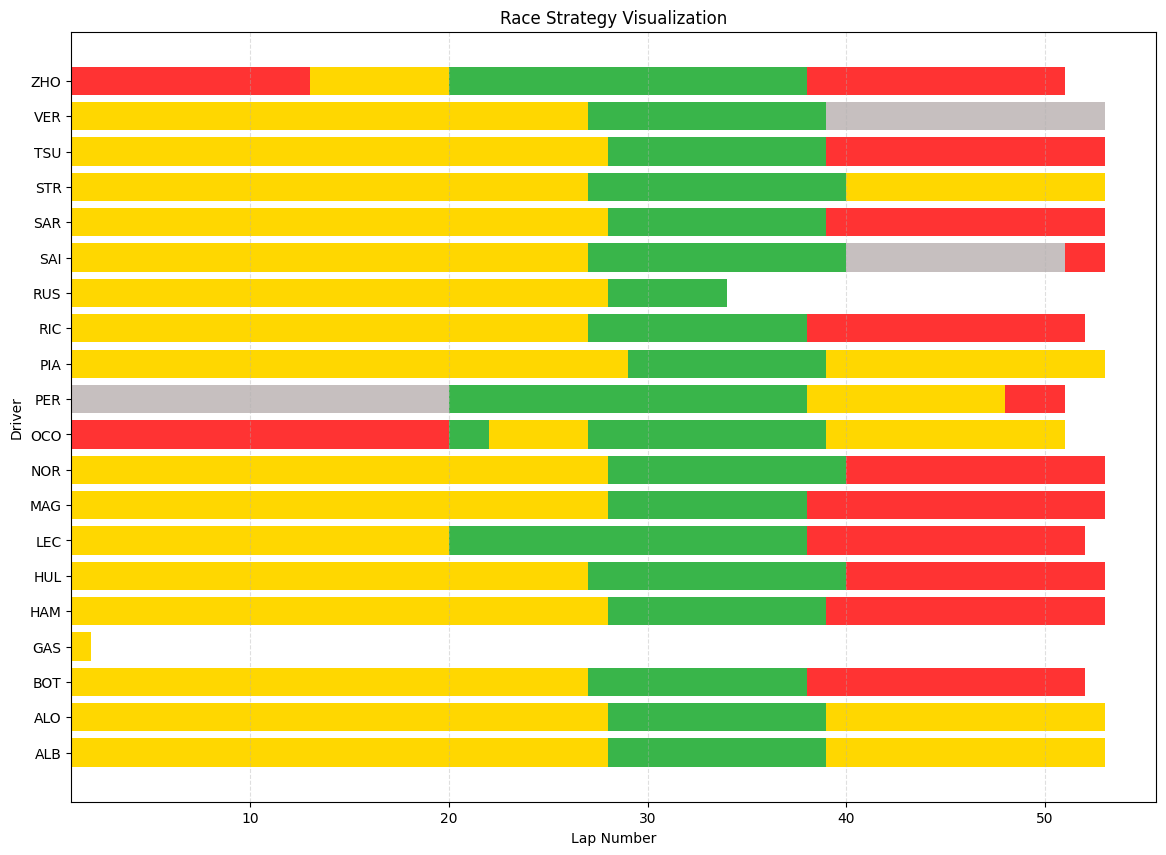

In [8]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
